In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch")

# Introduction to PyTorch

This tutorial shows the basics of PyTorch library.

We design simple Neural Networks for classification task on MNIST dataset.

Necessary knowledge you can find in PyTorch documentation:

https://pytorch.org/docs/stable/index.html

and tutorials:

https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

In [3]:
!mkdir data

1. PyTorch is based on tensor operations.
Please create tensors in the following ways:
- directly with python list
- from `numpy`
- with random values (initialize generator with your academic id / student number from USOS system)
- linear space in range from -5 to 15 and number of elements.
- 3 tensors with indices of each element of grid for dimensions: 1, 2, 3 (without 0-th - basically is a batch dim)

For all cases use `shape = (1, 3, 28, 28)`.

For display use `print` function.

In [4]:
import torch

shape = (1, 3, 28, 28)

Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x7ffababfff40>
Traceback (most recent call last):
  File "/usr/lib/python3.10/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):
KeyboardInterrupt: 


In [5]:
lst = [
    [
        [
            [
                x for x in range(shape[3])
            ] for _ in range(shape[2])
        ] for _ in range(shape[1])
    ] for _ in range(shape[0])
    ]
t1 = torch.tensor(lst)
print(t1)
print(t1.shape)

tensor([[[[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]]]])
torch.Size([1, 3, 28, 28])


In [6]:
import numpy as np

t2 = torch.tensor(np.array(lst))
print(t2)
print(t2.shape)

tensor([[[[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]]]])
torch.Size([1, 3, 28, 28])


In [7]:
gen = torch.Generator()
gen.manual_seed(401802)
t3 = torch.rand(shape, generator=gen)
print(t3)
print(t3.shape)

tensor([[[[0.6453, 0.2287, 0.4724,  ..., 0.2678, 0.2955, 0.4731],
          [0.2730, 0.0384, 0.0303,  ..., 0.7377, 0.5117, 0.1972],
          [0.7068, 0.6787, 0.9472,  ..., 0.8677, 0.2124, 0.3859],
          ...,
          [0.2690, 0.2431, 0.7328,  ..., 0.6926, 0.2133, 0.1222],
          [0.7872, 0.4325, 0.8115,  ..., 0.5331, 0.6813, 0.4586],
          [0.6141, 0.0350, 0.2233,  ..., 0.6925, 0.1176, 0.0934]],

         [[0.7880, 0.6926, 0.2405,  ..., 0.6460, 0.3366, 0.2797],
          [0.9582, 0.5104, 0.6337,  ..., 0.6905, 0.1257, 0.7467],
          [0.1009, 0.9521, 0.1382,  ..., 0.6071, 0.3786, 0.3313],
          ...,
          [0.1140, 0.1713, 0.3877,  ..., 0.7391, 0.6953, 0.2386],
          [0.8448, 0.4511, 0.2762,  ..., 0.7529, 0.6860, 0.6450],
          [0.2203, 0.5105, 0.7461,  ..., 0.0213, 0.9252, 0.7778]],

         [[0.0061, 0.8862, 0.7756,  ..., 0.0259, 0.8912, 0.5855],
          [0.9616, 0.2027, 0.6873,  ..., 0.6073, 0.6412, 0.7676],
          [0.4207, 0.2737, 0.0402,  ..., 0

In [8]:
vector = np.linspace(-5, 15, np.product(list(shape)))
vector.resize(shape)
t4 = torch.tensor(vector)
print(t4)
print(t4.shape)

tensor([[[[-5.0000, -4.9915, -4.9830,  ..., -4.7873, -4.7788, -4.7703],
          [-4.7618, -4.7533, -4.7448,  ..., -4.5491, -4.5406, -4.5321],
          [-4.5236, -4.5151, -4.5066,  ..., -4.3109, -4.3024, -4.2939],
          ...,
          [ 0.9549,  0.9634,  0.9719,  ...,  1.1676,  1.1761,  1.1846],
          [ 1.1931,  1.2016,  1.2101,  ...,  1.4058,  1.4143,  1.4228],
          [ 1.4313,  1.4398,  1.4483,  ...,  1.6440,  1.6525,  1.6610]],

         [[ 1.6695,  1.6780,  1.6865,  ...,  1.8822,  1.8907,  1.8992],
          [ 1.9077,  1.9162,  1.9247,  ...,  2.1204,  2.1289,  2.1374],
          [ 2.1459,  2.1544,  2.1629,  ...,  2.3586,  2.3671,  2.3756],
          ...,
          [ 7.6244,  7.6329,  7.6414,  ...,  7.8371,  7.8456,  7.8541],
          [ 7.8626,  7.8711,  7.8796,  ...,  8.0753,  8.0838,  8.0923],
          [ 8.1008,  8.1093,  8.1178,  ...,  8.3135,  8.3220,  8.3305]],

         [[ 8.3390,  8.3475,  8.3560,  ...,  8.5517,  8.5602,  8.5687],
          [ 8.5772,  8.5857,  

In [9]:
lst1 = [
    [
        [
            [
                x for _ in range(shape[3])
            ] for _ in range(shape[2])
        ] for x in range(shape[1])
    ] for _ in range(shape[0])
    ]
t51 = torch.tensor(lst1)
print(t51)
print(t51.shape)

tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          ...,
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1],
          [1, 1, 1,  ..., 1, 1, 1]],

         [[2, 2, 2,  ..., 2, 2, 2],
          [2, 2, 2,  ..., 2, 2, 2],
          [2, 2, 2,  ..., 2, 2, 2],
          ...,
          [2, 2, 2,  ..., 2, 2, 2],
          [2, 2, 2,  ..., 2, 2, 2],
          [2, 2, 2,  ..., 2, 2, 2]]]])
torch.Size([1, 3, 28, 28])


In [10]:
lst2 = [
    [
        [
            [
                x for _ in range(shape[3])
            ] for x in range(shape[2])
        ] for _ in range(shape[1])
    ] for _ in range(shape[0])
    ]
t52 = torch.tensor(lst2)
print(t52)
print(t52.shape)

tensor([[[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 1,  1,  1,  ...,  1,  1,  1],
          [ 2,  2,  2,  ...,  2,  2,  2],
          ...,
          [25, 25, 25,  ..., 25, 25, 25],
          [26, 26, 26,  ..., 26, 26, 26],
          [27, 27, 27,  ..., 27, 27, 27]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 1,  1,  1,  ...,  1,  1,  1],
          [ 2,  2,  2,  ...,  2,  2,  2],
          ...,
          [25, 25, 25,  ..., 25, 25, 25],
          [26, 26, 26,  ..., 26, 26, 26],
          [27, 27, 27,  ..., 27, 27, 27]],

         [[ 0,  0,  0,  ...,  0,  0,  0],
          [ 1,  1,  1,  ...,  1,  1,  1],
          [ 2,  2,  2,  ...,  2,  2,  2],
          ...,
          [25, 25, 25,  ..., 25, 25, 25],
          [26, 26, 26,  ..., 26, 26, 26],
          [27, 27, 27,  ..., 27, 27, 27]]]])
torch.Size([1, 3, 28, 28])


In [11]:
lst3 = [
    [
        [
            [
                x for x in range(shape[3])
            ] for _ in range(shape[2])
        ] for _ in range(shape[1])
    ] for _ in range(shape[0])
    ]
t53 = torch.tensor(lst3)
print(t53)
print(t53.shape)

tensor([[[[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]],

         [[ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          ...,
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27],
          [ 0,  1,  2,  ..., 25, 26, 27]]]])
torch.Size([1, 3, 28, 28])


2. PyTorch allow for applying GPU for computations.
Check is gpu (CUDA) is available, then use it as `device`, else use `'cpu'`.

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

3. To train a networks we need a dataset.

Please download `MINIST` dataset with `torchvision.dataset`.

For any kind of ML task, validation or testing is required.

So, create train and test datasets.

For train dataset apply also augmentation transforms, crop, translation and rotation.

You can try to apply different transforms.

For both apply ToTensor.

Next, pack datasets into `DataLoader`s with batch size of 64.
Use variables with names: `train_loader` and `test_loader`.

Next display sizes of datasets, shapes of elements and display few images and their labels.

100%|██████████| 9912422/9912422 [00:00<00:00, 181505768.11it/s]

Extracting /content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 168478016.45it/s]


Extracting /content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 109652477.31it/s]

Extracting /content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 33658178.04it/s]


Extracting /content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data/MNIST/raw

Data batch shape =  (64, 1, 28, 28)
Label:  7


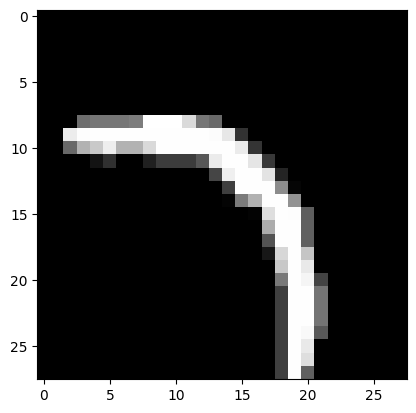

Label:  2


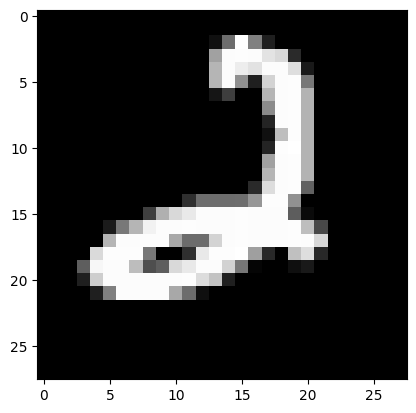

Label:  5


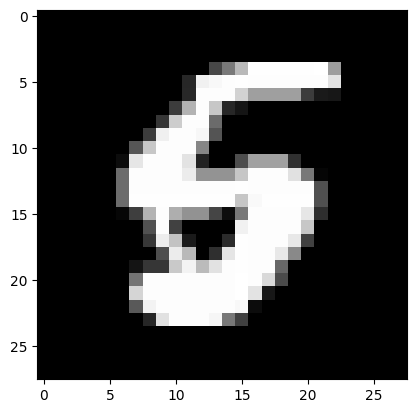

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


train_dataset = datasets.MNIST(root='/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data', train=True, download=True, transform=ToTensor())
test_dataset = datasets.MNIST(root='/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/data', train=False, download=True, transform=ToTensor())

batchsize = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batchsize, shuffle=True)
for X, Y in train_loader:
    print("Data batch shape = ", np.shape(X.numpy()))
    for i in range(3):
      print("Label: ", Y.numpy()[i])
      plt.imshow(X[i].reshape(28,28), cmap="gray")
      plt.show()
    break

4. `*`Additionally, you can prepare analysis of datasets.

E.g. statistics like mean and variance of all elements, for each label.

Analysis can allow you for designing better network architecture.   

5. When we have datasets, so we can create model for classification task.

Please, define class `MLP` as Multi Layer Perceptron

with two hidden fully connected layers with bias.

Class must inherits from `torch.nn.Module`.

Apply following configuration:

- first with 512 neurons,
- second with 512 neurons,
- output layer adjust to size of classification problem.

For `__init__` method add parameters: input_shape and output_size.

Don't forget about nonlinearities!

For hidden layers you can use `ReLU` module from `torch.nn`.

For output apply softmax function.

Network layer-by-layer processing define in `forward` method with argument as a network

input tensor - batch of images with shape (batch_size, channels, height, width).
(channels = 1, for gray scale images)

Instantiate model as `net` object.


In [14]:
class MLP(torch.nn.Module):

    def __init__(self, input_shape=(1, 28, 28), output_shape=10) -> None:
        super().__init__()
        neurons_counts = [512, 512]
        self.CNN = torch.nn.Sequential(
            torch.nn.Linear(torch.prod(torch.tensor(input_shape)),
                            neurons_counts[0]),
            torch.nn.ReLU(),
            torch.nn.Linear(neurons_counts[0], neurons_counts[1]),
            torch.nn.ReLU(),
            torch.nn.Linear(neurons_counts[1], output_shape)
            )
        self.FC = torch.nn.Softmax(dim=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = x.view(x.size(0), -1)
        x = self.CNN(x)
        return self.FC(x)


net = MLP()
print(net)

MLP(
  (CNN): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
  (FC): Softmax(dim=1)
)


6. To train network we need to know 'how good or bad' results it gives.
Please, instantiate `torch.nn.CrossEntropyLoss` as `loss_fcn`.

In [15]:
loss_fcn = torch.nn.CrossEntropyLoss()

7. To score network define accuracy metric.
For network output you need to decide what is the final network answer.
(`argmax`).

`torch.no_grad()` prevents gradient requirement for computations inside method.

In [16]:
from abc import ABC, abstractmethod
from typing import Any


class BaseMetric(ABC):

    @abstractmethod
    def __call__(self, y_pred, y_ref) -> Any:
        raise NotImplementedError()


class AccuracyMetric(BaseMetric):

    def __init__(self) -> None:
        pass

    @torch.no_grad()
    def __call__(self, y_pred: torch.Tensor, y_ref: torch.Tensor) -> torch.Tensor:
        """
        :param y_pred: tensor of shape (batch_size, num_of_classes) type float
        :param y_ref: tensor with shape (batch_size,) and type Long
        :return: scalar tensor with accuracy metric for batch
        """
        # scalar value
        score: torch.Tensor = (y_pred.argmax(dim=1) == y_ref).sum() / len(y_ref)

        return score


metric = AccuracyMetric()

8. To change network parameters, we need optimizers object.
Instantiate `torch.optim.SGD` (with `net`work parameters) as `optimizer`.
Use learning rate = 0.001

In [17]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

9. Now define training / testing function:

In [18]:
from typing import Tuple
import tqdm


def train(model: torch.nn.Module,
          data_generator,
          criterion,
          metric: BaseMetric,
          mode: str = 'test',
          optimizer: torch.optim.Optimizer = None,
          update_period: int = None,
          device = torch.device('cpu')) -> Tuple[torch.nn.Module, float, float]:

    # change model mode to train or test
    if mode == 'train':
        model = model.train(True)

    elif mode == 'test':
        model = model.train(False)

    else:
        raise RuntimeError("Unsupported mode.")

    # move model to device
    model.to(device)
    # reset model parameters' gradients with optimizer
    if mode == 'train':
        optimizer.zero_grad()

    total_loss = 0.0
    total_accuracy = 0.0
    samples_num = 0

    for i, (X, y) in tqdm.tqdm(enumerate(data_generator)):
        # convert tensors to device
        X = X.to(device)
        y = y.to(device)

        # depending on mode use or not torch.no_grad() as 'with' block
        if mode == "train":
          # process by network
          y_pred = model(X)
        else:
          with torch.no_grad():
            y_pred = model(X)

        # calculate loss
        loss = criterion(y_pred, y)

        if mode == "train":
          # designate gradient based on loss
          loss.backward()

        if mode == 'train' and (i+1) % update_period == 0:
            # update parameters with optimizer
            optimizer.step()
            optimizer.zero_grad()

        # calculate accuracy
        accuracy = metric(y_pred, y)

        total_loss += loss.item() * y_pred.shape[0]
        total_accuracy += accuracy.item() * y_pred.shape[0]
        samples_num += y_pred.shape[0]

    if samples_num == 0:
        return model, 0.0, 0.0

    return model, total_loss / samples_num, total_accuracy / samples_num

10. Prepare training loop (over epochs) function:
- adjust max number of epochs to achieve satisfactory results.
- `**` additionally, implement auto-detection of bias-variance tradeoff point, to break further training.
- `***` additionally, use learning rate scheduler.
- for each epoch collect losses and accuracies for both datasets.

In [22]:
def training(model, train_loader, test_loader, loss_fcn, metric, optimizer,
             update_period, epoch_max,
             device):
    loss_train = []
    loss_test = []
    acc_train = []
    acc_test = []

    for e in range(epoch_max):
        epoch = e + 1
        print(f'Epoch {epoch}')
        print('TRAINING')
        net, loss, acc = train(model, train_loader, loss_fcn, metric, "train",
                               optimizer, update_period, device)
        loss_train.append(loss)
        acc_train.append(acc)

        print('VALIDATION')
        net, loss, acc = train(model, train_loader, loss_fcn, metric, "test",
                               optimizer, update_period, device)
        loss_test.append(loss)
        acc_test.append(acc)

        print(f"Training results: loss = {loss_train[-1]}, " \
              f"accuracy = {acc_train[-1]}")
        print(f"Test results: loss = {loss_test[-1]}, " \
              f"accuracy = {acc_test[-1]}")
        print("\n\n")
        # if len(acc_train) >= 3 and acc_train[-1] <= acc_train[-3]:
        #     break

    return model, {'loss_train': loss_train, 'acc_train': acc_train,
                   'loss_test': loss_test, 'acc_test': acc_test}

11. Display training history.

In [23]:
net, values = training(net, train_loader, test_loader, loss_fcn, metric, optimizer, update_period=2, epoch_max=20, device=device)

Epoch 1
TRAINING


938it [00:09, 94.84it/s] 


VALIDATION


938it [00:09, 104.13it/s]


Training results: loss = 2.0071264750798545, accuracy = 0.5213166666666667
Test results: loss = 1.909945068613688, accuracy = 0.6404666666666666



Epoch 2
TRAINING


938it [00:09, 101.69it/s]


VALIDATION


938it [00:09, 101.81it/s]


Training results: loss = 1.8631460544586183, accuracy = 0.6500666666666667
Test results: loss = 1.834102218437195, accuracy = 0.6580166666666667



Epoch 3
TRAINING


938it [00:09, 94.42it/s] 


VALIDATION


938it [00:08, 114.39it/s]


Training results: loss = 1.8159833222071329, accuracy = 0.6717666666666666
Test results: loss = 1.7899995246887208, accuracy = 0.72505



Epoch 4
TRAINING


938it [00:10, 85.42it/s]


VALIDATION


938it [00:09, 98.43it/s] 


Training results: loss = 1.7718566625595094, accuracy = 0.7321333333333333
Test results: loss = 1.7569874092737834, accuracy = 0.7378



Epoch 5
TRAINING


938it [00:10, 88.93it/s]


VALIDATION


938it [00:08, 113.90it/s]


Training results: loss = 1.7417929545084636, accuracy = 0.7504333333333333
Test results: loss = 1.7067019801457723, accuracy = 0.8040666666666667



Epoch 6
TRAINING


938it [00:11, 81.57it/s] 


VALIDATION


938it [00:09, 100.09it/s]


Training results: loss = 1.6915543363571166, accuracy = 0.8114833333333333
Test results: loss = 1.679191378847758, accuracy = 0.8161



Epoch 7
TRAINING


938it [00:08, 106.55it/s]


VALIDATION


938it [00:09, 102.77it/s]


Training results: loss = 1.6711066129684449, accuracy = 0.8196
Test results: loss = 1.6641081320444744, accuracy = 0.8229333333333333



Epoch 8
TRAINING


938it [00:09, 94.54it/s] 


VALIDATION


938it [00:08, 112.39it/s]


Training results: loss = 1.6587766386667888, accuracy = 0.8253
Test results: loss = 1.6541321623484293, accuracy = 0.82845



Epoch 9
TRAINING


938it [00:09, 95.03it/s]


VALIDATION


938it [00:09, 101.40it/s]


Training results: loss = 1.6505254992802938, accuracy = 0.82915
Test results: loss = 1.6468296215693157, accuracy = 0.8312166666666667



Epoch 10
TRAINING


938it [00:09, 96.62it/s]


VALIDATION


938it [00:08, 108.33it/s]


Training results: loss = 1.644531620724996, accuracy = 0.8323666666666667
Test results: loss = 1.6418154263178508, accuracy = 0.8341833333333334



Epoch 11
TRAINING


938it [00:10, 93.55it/s] 


VALIDATION


938it [00:09, 103.42it/s]


Training results: loss = 1.6398886096954346, accuracy = 0.8348166666666667
Test results: loss = 1.637620347150167, accuracy = 0.8367166666666667



Epoch 12
TRAINING


938it [00:08, 104.69it/s]


VALIDATION


938it [00:09, 101.23it/s]


Training results: loss = 1.6342969696044922, accuracy = 0.8388666666666666
Test results: loss = 1.6189810227711996, accuracy = 0.8676833333333334



Epoch 13
TRAINING


938it [00:09, 95.23it/s] 


VALIDATION


938it [00:08, 113.96it/s]


Training results: loss = 1.6067849481582641, accuracy = 0.8807666666666667
Test results: loss = 1.5977260316212971, accuracy = 0.8887833333333334



Epoch 14
TRAINING


938it [00:09, 93.92it/s] 


VALIDATION


938it [00:09, 100.85it/s]


Training results: loss = 1.592649597676595, accuracy = 0.8918166666666667
Test results: loss = 1.5879857601801555, accuracy = 0.89435



Epoch 15
TRAINING


938it [00:09, 100.72it/s]


VALIDATION


938it [00:08, 105.81it/s]


Training results: loss = 1.5843378730773925, accuracy = 0.8966166666666666
Test results: loss = 1.5809386424382528, accuracy = 0.8989



Epoch 16
TRAINING


938it [00:09, 94.74it/s] 


VALIDATION


938it [00:09, 103.26it/s]


Training results: loss = 1.5783966407775878, accuracy = 0.9
Test results: loss = 1.5753729290644327, accuracy = 0.9025



Epoch 17
TRAINING


938it [00:09, 102.08it/s]


VALIDATION


938it [00:09, 101.72it/s]


Training results: loss = 1.573549946975708, accuracy = 0.9040833333333333
Test results: loss = 1.5713917855580648, accuracy = 0.9052833333333333



Epoch 18
TRAINING


938it [00:09, 94.50it/s]


VALIDATION


938it [00:09, 101.28it/s]


Training results: loss = 1.56971406695048, accuracy = 0.9061833333333333
Test results: loss = 1.5677108980814616, accuracy = 0.9076166666666666



Epoch 19
TRAINING


938it [00:10, 92.95it/s] 


VALIDATION


938it [00:09, 100.64it/s]


Training results: loss = 1.5664242563247681, accuracy = 0.9085833333333333
Test results: loss = 1.5648091995239257, accuracy = 0.9094333333333333



Epoch 20
TRAINING


938it [00:09, 100.43it/s]


VALIDATION


938it [00:08, 107.79it/s]

Training results: loss = 1.5635946955362956, accuracy = 0.9103666666666667
Test results: loss = 1.5623614702860513, accuracy = 0.9112666666666667





In [28]:
import matplotlib.pyplot as plt

def history(train, test):
    n_epochs = len(train)
    plt.plot(range(1, n_epochs + 1), train, range(1, n_epochs + 1), test)
    plt.legend(["train", "test"])
    plt.show()

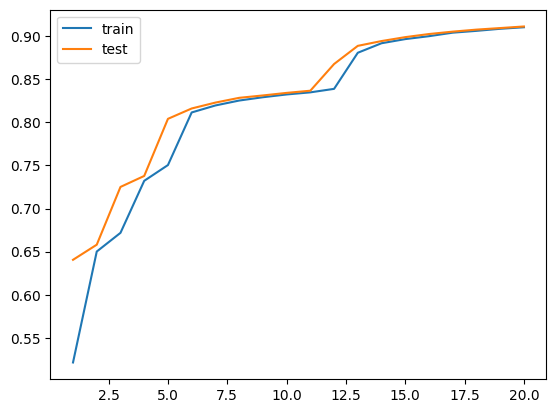

In [29]:
history(values["acc_train"], values["acc_test"])

12. Save model and optimizer states to files.

Use method `state_dict` and function `torch.save`.

In [30]:
sd = {'model': net.state_dict(), 'opt': optimizer.state_dict()}
torch.save(sd, '/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/MNIST.pth',
           _use_new_zipfile_serialization=False)

13. Create new network with the same architecture and initialize it with saved weights.

`torch.load`, `load_state_dict`.

In [39]:
net2 = MLP()
pretrainedModel = torch.load("/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/MNIST.pth", map_location=device)
net2.load_state_dict(pretrainedModel['model'])
net2, loss, acc = train(net2, test_loader, loss_fcn, metric, "test",
                       optimizer, update_period=5, device=device)
print(f"\nloss = {loss}\naccuracy = {acc}")

157it [00:01, 115.62it/s]


loss = 1.56022332572937
accuracy = 0.9111


14. Define your own model and train it.

Try achieve better results.

You can use different parameters, layers e.g.:
- conv2d
- maxpooling2d
- batch norm 2d
- and more...

Save weights to file.

In [79]:
class CNN(torch.nn.Module):

    def __init__(self, input_shape=(1, 28, 28), output_shape=10) -> None:
        super().__init__()
        neurons_counts = [32, 64, 128]
        self.CNN = torch.nn.Sequential(
            torch.nn.Conv2d(input_shape[0], neurons_counts[0], 3, padding=1),
            torch.nn.BatchNorm2d(neurons_counts[0]),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d((3, 3)),
            torch.nn.Conv2d(neurons_counts[0], neurons_counts[1], 3, padding=1),
            torch.nn.BatchNorm2d(neurons_counts[1]),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d((3, 3)),
            torch.nn.Conv2d(neurons_counts[1], neurons_counts[2], 3),
            torch.nn.BatchNorm2d(neurons_counts[2]),
            torch.nn.ReLU()
            # torch.nn.Conv2d(neurons_counts[2], neurons_counts[2], 3),
            # torch.nn.ReLU()
            )
        CNN_flatten_len = 128
        self.FC = torch.nn.Sequential(
            torch.nn.Flatten(),
            torch.nn.Linear(in_features=CNN_flatten_len, out_features=output_shape),
            torch.nn.Softmax(dim=1)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.CNN(x)
        return self.FC(x)


net3 = CNN()
print(net3)

CNN(
  (CNN): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
  )
  (FC): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=128, out_features=10, bias=True)
    (2): Softmax(dim=1)
  )
)


Epoch 1
TRAINING


938it [00:11, 81.60it/s]


VALIDATION


938it [00:10, 93.57it/s]


Training results: loss = 2.300556175613403, accuracy = 0.11248333333333334
Test results: loss = 2.300407355372111, accuracy = 0.11165



Epoch 2
TRAINING


938it [00:13, 70.05it/s]


VALIDATION


938it [00:08, 107.78it/s]


Training results: loss = 2.300559514490763, accuracy = 0.11146666666666667
Test results: loss = 2.3007178461710613, accuracy = 0.11135



Epoch 3
TRAINING


938it [00:11, 81.79it/s]


VALIDATION


938it [00:09, 97.29it/s] 


Training results: loss = 2.300552236557007, accuracy = 0.11243333333333333
Test results: loss = 2.300265813700358, accuracy = 0.11385



Epoch 4
TRAINING


938it [00:11, 81.05it/s]


VALIDATION


938it [00:08, 107.66it/s]


Training results: loss = 2.300510533396403, accuracy = 0.11361666666666667
Test results: loss = 2.300512281926473, accuracy = 0.11016666666666666



Epoch 5
TRAINING


938it [00:11, 80.93it/s]


VALIDATION


938it [00:09, 96.94it/s] 


Training results: loss = 2.300549921544393, accuracy = 0.1115
Test results: loss = 2.300448041788737, accuracy = 0.11203333333333333



Epoch 6
TRAINING


938it [00:11, 80.53it/s]


VALIDATION


938it [00:09, 102.07it/s]


Training results: loss = 2.3005779123942056, accuracy = 0.11196666666666667
Test results: loss = 2.3004844974517824, accuracy = 0.11156666666666666



Epoch 7
TRAINING


938it [00:11, 84.52it/s]


VALIDATION


938it [00:09, 95.52it/s] 


Training results: loss = 2.3005476959228517, accuracy = 0.11188333333333333
Test results: loss = 2.3005310986836753, accuracy = 0.11126666666666667



Epoch 8
TRAINING


938it [00:11, 80.72it/s]


VALIDATION


938it [00:09, 96.40it/s]


Training results: loss = 2.3005428043365477, accuracy = 0.112
Test results: loss = 2.3005039567311605, accuracy = 0.11136666666666667



Epoch 9
TRAINING


938it [00:11, 84.24it/s]


VALIDATION


938it [00:09, 101.48it/s]


Training results: loss = 2.300563307317098, accuracy = 0.11205
Test results: loss = 2.3004345476786296, accuracy = 0.11185



Epoch 10
TRAINING


938it [00:11, 80.33it/s]


VALIDATION


938it [00:09, 95.11it/s] 


Training results: loss = 2.300566492462158, accuracy = 0.11108333333333334
Test results: loss = 2.30068329149882, accuracy = 0.11145





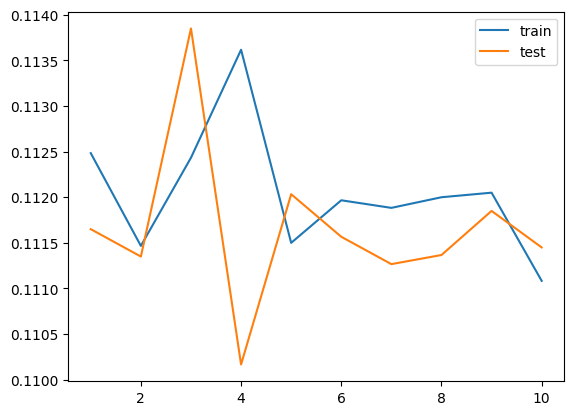

157it [00:01, 108.97it/s]


loss = 2.300340380859375
accuracy = 0.1079


In [80]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
net3, values = training(net3, train_loader, test_loader, loss_fcn, metric, optimizer, update_period=5, epoch_max=10, device=device)
history(values["acc_train"], values["acc_test"])
sd = {'model': net3.state_dict(), 'opt': optimizer.state_dict()}
torch.save(sd, '/content/drive/MyDrive/STUDIA/Semestr_8/ES/pytorch/MNISTv2.pth',
           _use_new_zipfile_serialization=False)
net3, loss, acc = train(net3, test_loader, loss_fcn, metric, "test",
                       optimizer, update_period=5, device=device)
print(f"\nloss = {loss}\naccuracy = {acc}")

15. You can leave a feedback, if you want :)

16. Send your results(notebook+weights) in a *.zip file by e-mail

or (preferred) send link to your's github (public) repository with your results.